# **ANALISIS SENTIMEN BERBASIS ASPEK PADA ULASAN APLIKASI STOCKBIT MENGGUNAKAN ALGORITMA RANDOM FOREST DAN LDA**

## **KELOMPOK 1**

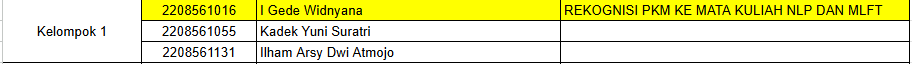


## **Sumber data**

- kaggle : https://www.kaggle.com/datasets/andrimartin/ulasan-aplikasi

## ALUR TAHAP AWAL (ANALISIS DAN TEXT PREPROCESSING)
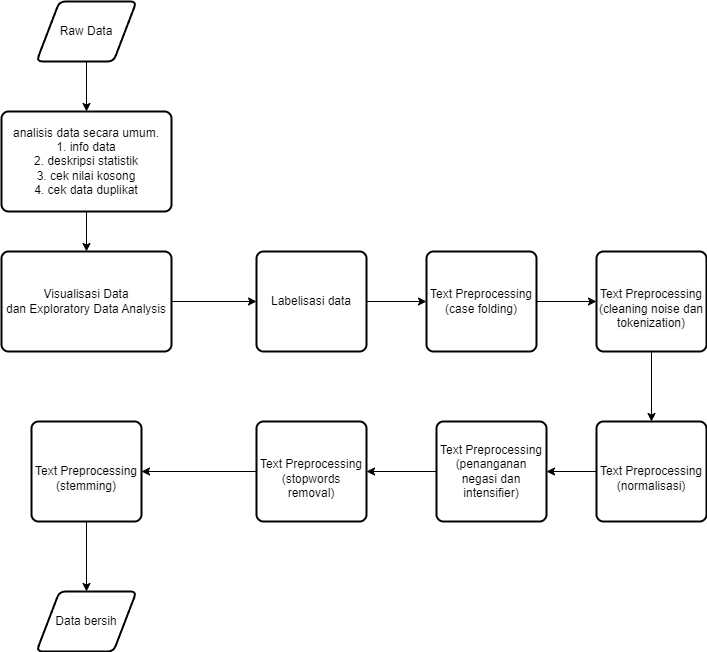

# Import Data

In [1]:
import pandas as pd

data = pd.read_excel('https://docs.google.com/spreadsheets/d/1GrLuZR6hdX02UGXoGedzqCkbdy7AOCgU/export?format=xlsx')

data.sample(5)

,reviewId,userName,o,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
7434,13ceb562-c0b8-4836-a9cc-608877b91bc2,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,mantapp buat belajar saham,4,0,1.7.44,2019-04-05 09:06:32,"Hi, Thank you for taking the time to leave us ...",2019-04-05 09:13:31,1.7.44
10033,b1afe649-41e6-4a10-b743-aab1dfa50f82,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Ok,5,0,2.3.7,2022-06-14 22:13:15,"Halo Safadiah Putri kafitri, Kami senang Kamu ...",2022-06-15 17:27:53,2.3.7
4033,8a969689-a342-4fe3-a2f6-dfefadc050e5,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Verifikasi udah hampir seminggu ga di acc acc,...",1,15,2.23.2,2024-04-30 21:52:38,"Halo kak Meta Suyanto,\n\nUntuk verifikasi dat...",2024-05-01 05:52:41,2.23.2
10784,0d316469-884b-4cce-8cf9-6fc01aeec8cc,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Mantap,5,0,2.0.3,2021-11-11 09:44:05,"hai ijal najib, ""Terima kasih atas ulasan posi...",2021-11-12 21:31:45,2.0.3
3257,1868cd9a-3e4c-47b2-a1e2-a41b85123c11,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,aplikasi ringan dan mudah di pahami,5,0,2.3.14,2022-08-24 11:46:02,"Halo my land, Kami senang Kamu menyukai aplika...",2022-08-24 12:28:14,2.3.14


# Analisis Info Dataset secara Umum

In [2]:
# ===============================================
# 🧾 Info Umum Dataset
# ===============================================
print("\n📋 Info Data:")
print(data.info())


📋 Info Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13020 entries, 0 to 13019
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              13020 non-null  object
 1   userName              13020 non-null  object
 2   o                     13020 non-null  object
 3   content               13020 non-null  object
 4   score                 13020 non-null  int64 
 5   thumbsUpCount         13020 non-null  int64 
 6   reviewCreatedVersion  11057 non-null  object
 7   at                    13020 non-null  object
 8   replyContent          10199 non-null  object
 9   repliedAt             10199 non-null  object
 10  appVersion            11057 non-null  object
dtypes: int64(2), object(9)
memory usage: 1.1+ MB
None


In [3]:
print("\n📈 Deskripsi Statistik:")
print(data.describe(include='all'))




📈 Deskripsi Statistik:
                                    reviewId         userName  \
count                                  13020            13020   
unique                                 13020                1   
top     186460dc-afda-4c7e-b41a-0ddfba322153  Pengguna Google   
freq                                       1            13020   
mean                                     NaN              NaN   
std                                      NaN              NaN   
min                                      NaN              NaN   
25%                                      NaN              NaN   
50%                                      NaN              NaN   
75%                                      NaN              NaN   
max                                      NaN              NaN   

                                                        o content  \
count                                               13020   13020   
unique                                                  1

In [4]:
print("\n🔍 Cek Nilai Kosong:")
print(data.isnull().sum())


🔍 Cek Nilai Kosong:
reviewId                   0
userName                   0
o                          0
content                    0
score                      0
thumbsUpCount              0
reviewCreatedVersion    1963
at                         0
replyContent            2821
repliedAt               2821
appVersion              1963
dtype: int64


In [5]:
print("\n🔍 Cek Data Ganda:")
print(data.duplicated().sum())


🔍 Cek Data Ganda:
0


# EDA dan Visualisasi Data (Sebelum Text Preprocessing)


C:\Users\ilham\AppData\Local\Temp\ipykernel_25700\3909203571.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='score', data=data, palette='viridis')


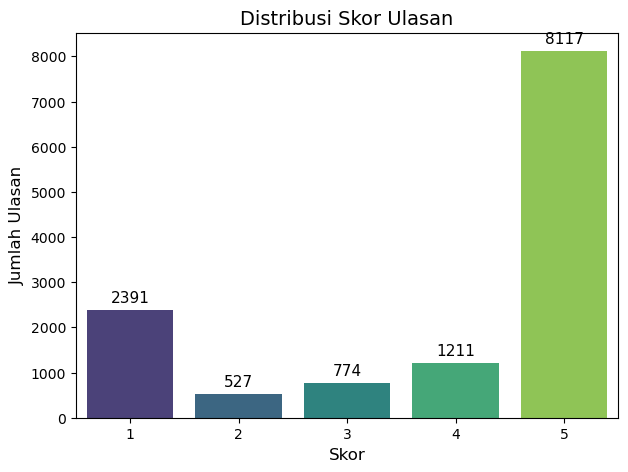

In [6]:
# ===============================================
# 📊 Distribusi Skor + Jumlah di Atas Batang
# ===============================================
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7,5))
ax = sns.countplot(x='score', data=data, palette='viridis')

# Tambahkan angka di atas setiap batang
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=11, padding=3, color='black')

plt.title('Distribusi Skor Ulasan', fontsize=14)
plt.xlabel('Skor', fontsize=12)
plt.ylabel('Jumlah Ulasan', fontsize=12)
plt.show()

C:\Users\ilham\AppData\Local\Temp\ipykernel_25700\1915521510.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top10_bulan['at'].astype(str), y='jumlah_ulasan', data=top10_bulan, palette='viridis')


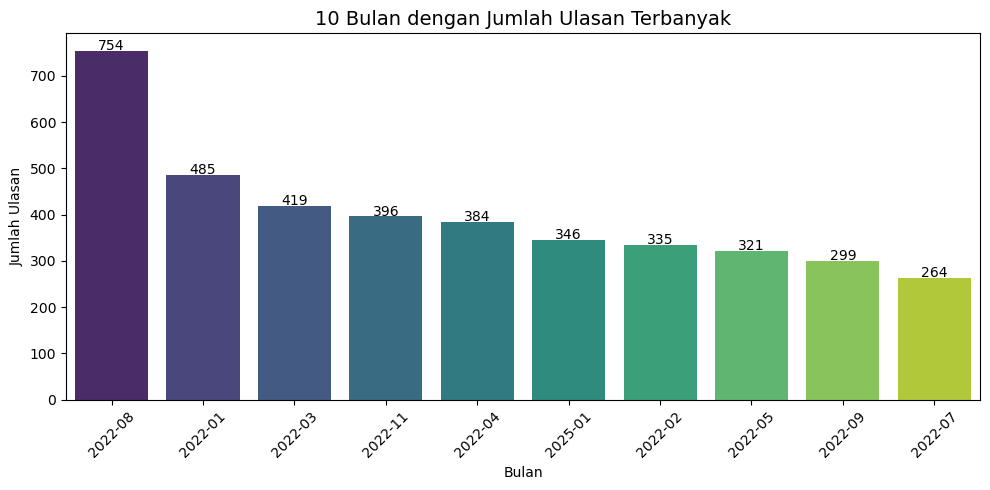

In [7]:
# ============================================================
# 🕓 DISTRIBUSI WAKTU PENULISAN ULASAN (TOP 10 BULAN TERBANYAK)
# ============================================================
data['at'] = pd.to_datetime(data['at'], errors='coerce')

# Hitung jumlah ulasan per bulan
ulasan_per_bulan = data.groupby(data['at'].dt.to_period('M')).size().reset_index(name='jumlah_ulasan')

# Urutkan dari yang terbanyak dan ambil 10 teratas
top10_bulan = ulasan_per_bulan.sort_values('jumlah_ulasan', ascending=False).head(10)

# Plot
plt.figure(figsize=(10,5))
sns.barplot(x=top10_bulan['at'].astype(str), y='jumlah_ulasan', data=top10_bulan, palette='viridis')

# Tambahkan angka di atas batang
for i, val in enumerate(top10_bulan['jumlah_ulasan']):
    plt.text(i, val + 2, str(val), ha='center', fontsize=10, color='black')

plt.title('10 Bulan dengan Jumlah Ulasan Terbanyak', fontsize=14)
plt.xlabel('Bulan')
plt.ylabel('Jumlah Ulasan')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\ilham\AppData\Local\Temp\ipykernel_25700\3541339844.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='appVersion', y='score', data=avg_version, palette='mako')


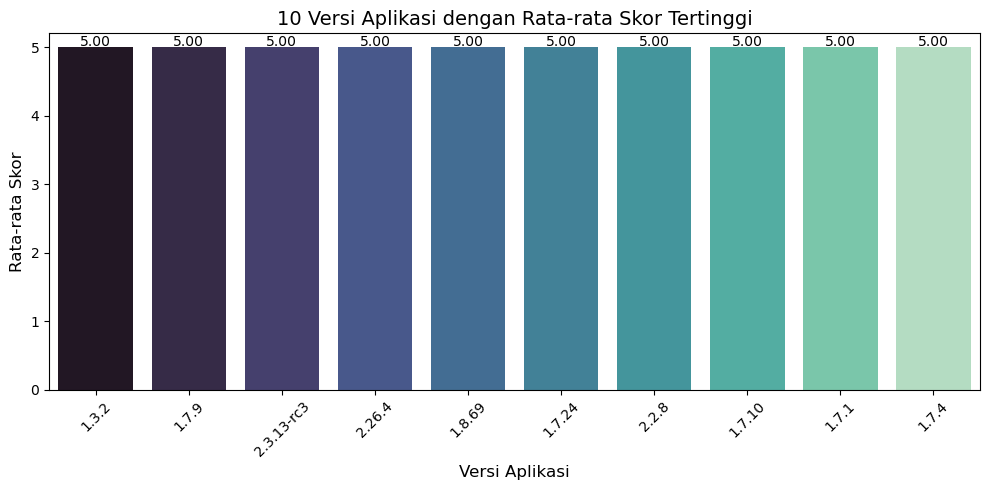

In [8]:
# ============================================================
# 🧩 RATA-RATA SKOR PER VERSI APLIKASI (TOP 10)
# ============================================================
plt.figure(figsize=(10,5))

# Hitung rata-rata skor per versi, lalu ambil 10 versi dengan skor tertinggi
avg_version = (
    data.groupby('appVersion')['score']
    .mean()
    .reset_index()
    .sort_values('score', ascending=False)
    .head(10)
)

# Plot bar chart
ax = sns.barplot(x='appVersion', y='score', data=avg_version, palette='mako')

# Tambahkan label di atas batang
for i, val in enumerate(avg_version['score']):
    plt.text(i, val + 0.02, f"{val:.2f}", ha='center', fontsize=10, color='black')

plt.title('10 Versi Aplikasi dengan Rata-rata Skor Tertinggi', fontsize=14)
plt.xlabel('Versi Aplikasi', fontsize=12)
plt.ylabel('Rata-rata Skor', fontsize=12)
plt.xticks(rotation=45)
plt.ylim(0, 5.2)
plt.tight_layout()
plt.show()

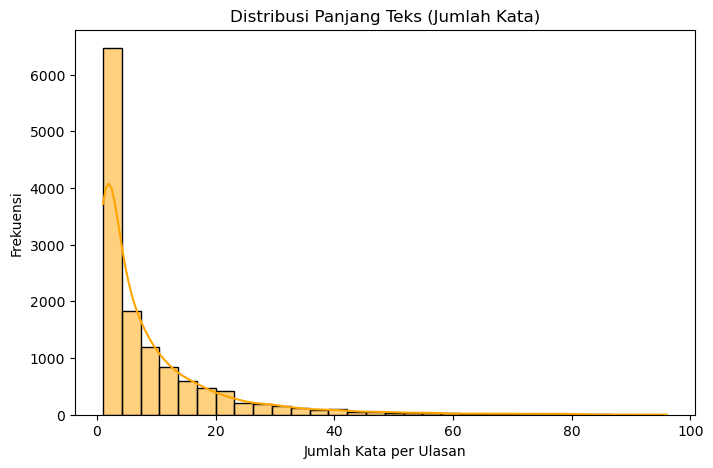

In [9]:
# ============================================================
# ✍️ PANJANG TEKS (MENTAH, SEBELUM CLEANING)
# ============================================================
data['text_length_raw'] = data['content'].astype(str).apply(lambda x: len(x.split()))

plt.figure(figsize=(8,5))
sns.histplot(data['text_length_raw'], bins=30, kde=True, color='orange')
plt.title('Distribusi Panjang Teks (Jumlah Kata)')
plt.xlabel('Jumlah Kata per Ulasan')
plt.ylabel('Frekuensi')
plt.show()

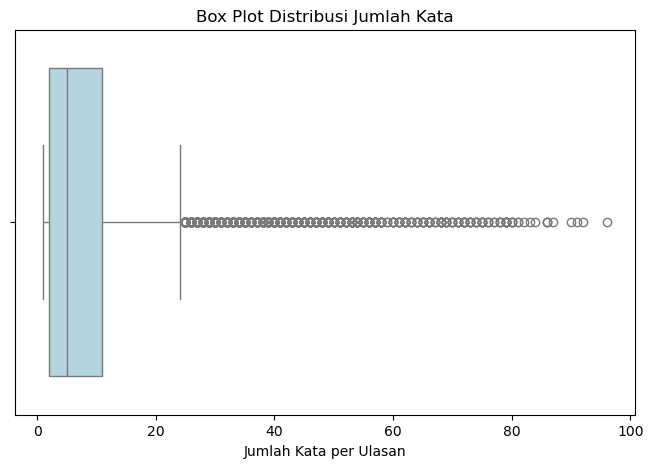

In [10]:
# ============================================================
# 📦 BOX PLOT JUMLAH KATA
# ============================================================
plt.figure(figsize=(8, 5))
sns.boxplot(x=data['text_length_raw'], color='lightblue')
plt.title('Box Plot Distribusi Jumlah Kata')
plt.xlabel('Jumlah Kata per Ulasan')
plt.show()

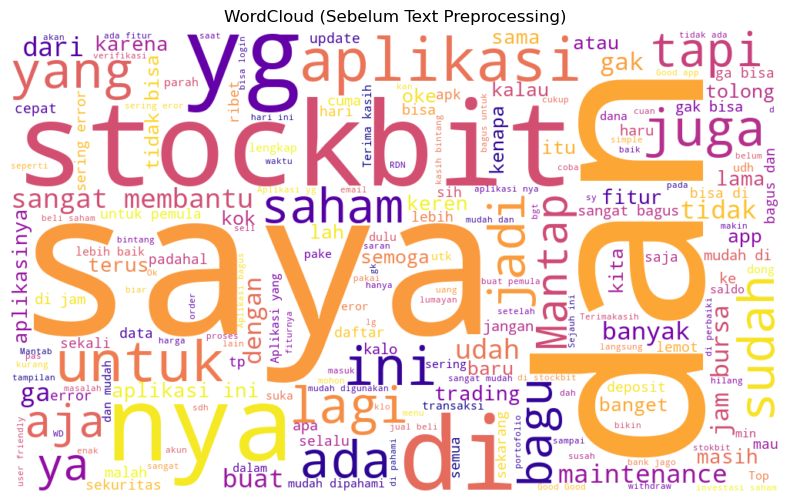

In [11]:
# ============================================================
# ☁️ WORDCLOUD MENTAH (BELUM BERSIH)
# ============================================================
from wordcloud import WordCloud

all_text = ' '.join(data['content'].astype(str))
wordcloud = WordCloud(width=1000, height=600, background_color='white', colormap='plasma').generate(all_text)

plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud (Sebelum Text Preprocessing)')
plt.show()

C:\Users\ilham\AppData\Local\Temp\ipykernel_25700\4243528224.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Kata', x='Frekuensi', data=common_words, palette='magma')


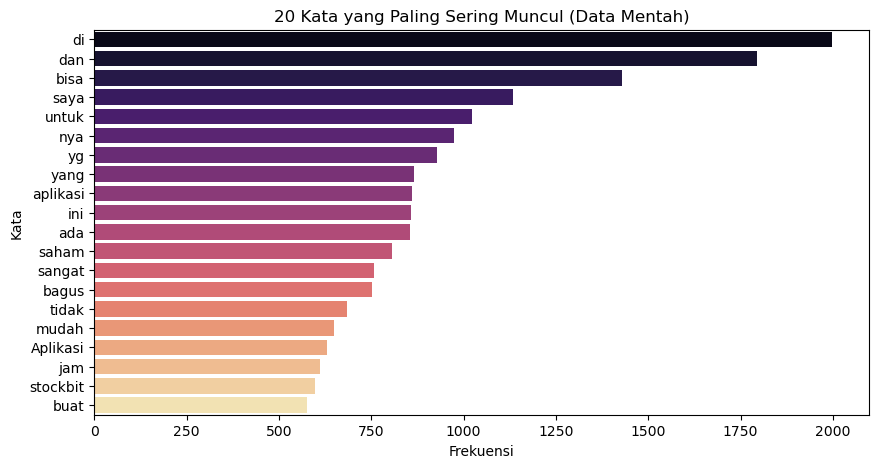

In [12]:
# ============================================================
# 🔠 20 KATA PALING SERING MUNCUL (MENTAH)
# ============================================================
from collections import Counter

words = all_text.split()
word_freq = Counter(words)
common_words = pd.DataFrame(word_freq.most_common(20), columns=['Kata', 'Frekuensi'])

plt.figure(figsize=(10,5))
sns.barplot(y='Kata', x='Frekuensi', data=common_words, palette='magma')
plt.title('20 Kata yang Paling Sering Muncul (Data Mentah)')
plt.show()

In [13]:
# ============================================================
# 📋 RINGKASAN
# ============================================================
print("Jumlah total ulasan:", len(data))
print("Rata-rata panjang ulasan:", round(data['text_length_raw'].mean(), 2), "kata")
print("Rata-rata skor:", round(data['score'].mean(), 2))

Jumlah total ulasan: 13020
Rata-rata panjang ulasan: 8.95 kata
Rata-rata skor: 3.93


# LABELISASI

In [14]:
# Menyisakan hanya kolom content dan score
data_prepro = data[['content', 'score']]

# Cek hasil
data_prepro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13020 entries, 0 to 13019
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  13020 non-null  object
 1   score    13020 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 203.6+ KB


In [15]:
# ============================================================
# 🏷️ LABELISASI SENTIMEN BERDASARKAN SKOR
# ============================================================

# Menyisakan hanya kolom content dan score
data_prepro = data[['content', 'score']].copy()

# Membuat kolom label berdasarkan skor
def label_sentiment(score):
    if score >= 4:
        return 'positive'
    elif score == 3:
        return 'neutral'
    else:
        return 'negative'

data_prepro['label'] = data_prepro['score'].apply(label_sentiment)

# Cek hasil labelisasi
print(data_prepro['label'].value_counts())
data_prepro.head()

label
positive    9328
negative    2918
neutral      774
Name: count, dtype: int64


,content,score,label
0,"hey admin, ku harap update berikutnya aplikasi...",4,positive
1,Gak ada lawan. Pengalaman interface yang luar ...,5,positive
2,Kelebihan : Chat Support cepat dijawab dan dil...,4,positive
3,Charting masih pinjam punya tradingview. Indik...,1,negative
4,Agak males ah klo misal hapus akun terus no sa...,1,negative


C:\Users\ilham\AppData\Local\Temp\ipykernel_25700\2046144023.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='label', data=data_prepro, palette='viridis')


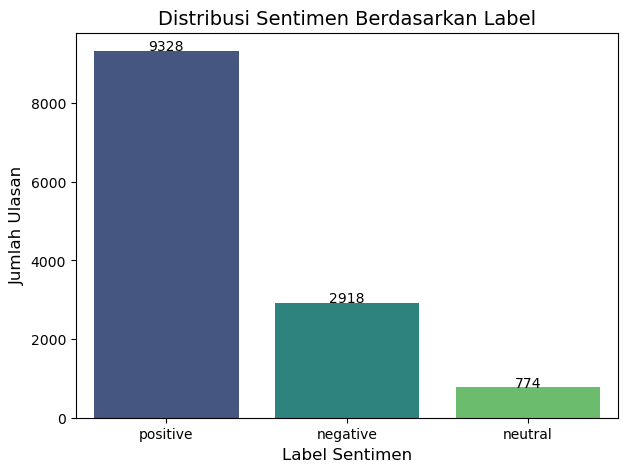

In [16]:
# ============================================================
# 📊 DISTRIBUSI LABEL SENTIMEN
# ============================================================

plt.figure(figsize=(7,5))
ax = sns.countplot(x='label', data=data_prepro, palette='viridis')

# Tambahkan angka di atas batang
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_height() + 5,
            int(p.get_height()), ha='center', fontsize=10, color='black')

plt.title('Distribusi Sentimen Berdasarkan Label', fontsize=14)
plt.xlabel('Label Sentimen', fontsize=12)
plt.ylabel('Jumlah Ulasan', fontsize=12)
plt.show()

--- Bigram WordClouds ---


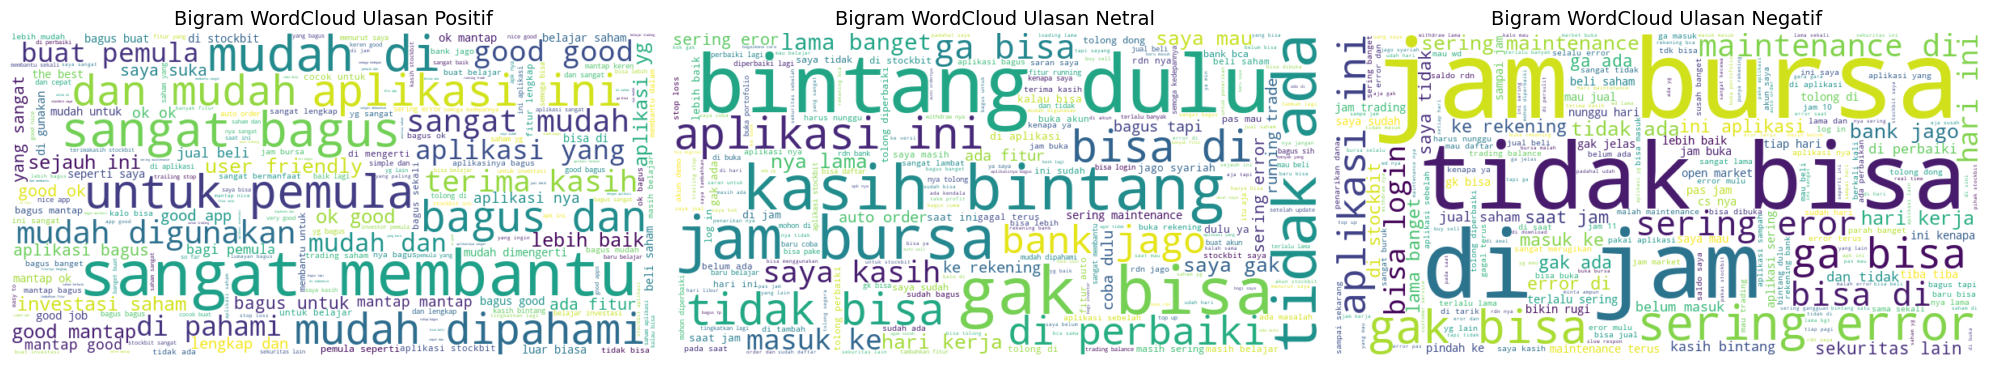


--- Trigram WordClouds ---


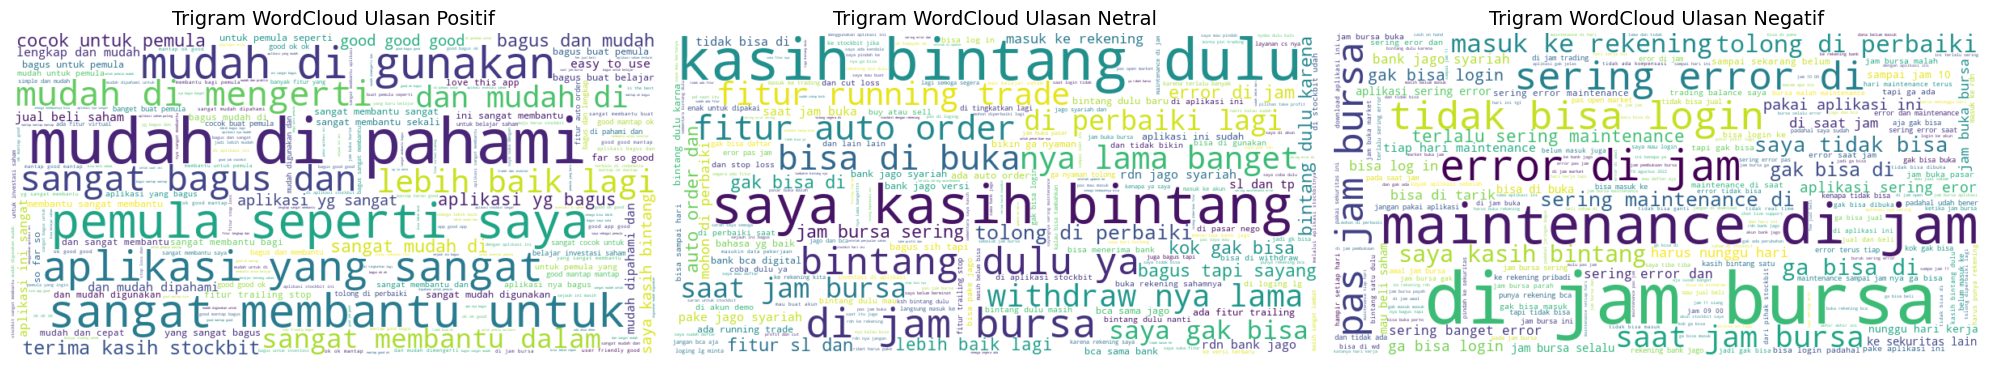

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

# Fungsi untuk mendapatkan n-gram
def get_ngrams(text, n):
    vectorizer = CountVectorizer(ngram_range=(n, n))
    # Handle empty strings in text
    if not text:
        return {}
    try:
        X = vectorizer.fit_transform([text])
        feature_names = vectorizer.get_feature_names_out()
        frequencies = X.sum(axis=0).A1
        return dict(zip(feature_names, frequencies))
    except ValueError:
        # Handle cases where text is too short for n-grams
        return {}


# Pisahkan data berdasarkan label
data_positif = data_prepro[data_prepro['label'] == "positive"]
data_negatif = data_prepro[data_prepro['label'] == "negative"]
data_netral  = data_prepro[data_prepro['label'] == "neutral"]

# Gabungkan semua teks bersih dari kolom 'Clean_Text' untuk setiap kategori
all_text_positif = ' '.join(data_positif['content'].dropna())
all_text_negatif = ' '.join(data_negatif['content'].dropna())
all_text_netral  = ' '.join(data_netral['content'].dropna())

# --- Bigram WordClouds ---
print("--- Bigram WordClouds ---")
plt.figure(figsize=(20, 8))

# Positif Bigram
bigram_positif = get_ngrams(all_text_positif, 2)
if bigram_positif:
    wordcloud_bigram_positif = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate_from_frequencies(bigram_positif)
    ax = plt.subplot(1, 3, 1)
    ax.imshow(wordcloud_bigram_positif, interpolation='bilinear')
    ax.set_title('Bigram WordCloud Ulasan Positif', fontsize=14)
    ax.axis('off')

# Netral Bigram
bigram_netral = get_ngrams(all_text_netral, 2)
if bigram_netral:
    wordcloud_bigram_netral = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate_from_frequencies(bigram_netral)
    ax = plt.subplot(1, 3, 2)
    ax.imshow(wordcloud_bigram_netral, interpolation='bilinear')
    ax.set_title('Bigram WordCloud Ulasan Netral', fontsize=14)
    ax.axis('off')

# Negatif Bigram
bigram_negatif = get_ngrams(all_text_negatif, 2)
if bigram_negatif:
    wordcloud_bigram_negatif = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate_from_frequencies(bigram_negatif)
    ax = plt.subplot(1, 3, 3)
    ax.imshow(wordcloud_bigram_negatif, interpolation='bilinear')
    ax.set_title('Bigram WordCloud Ulasan Negatif', fontsize=14)
    ax.axis('off')

plt.tight_layout()
plt.show()


# --- Trigram WordClouds ---
print("\n--- Trigram WordClouds ---")
plt.figure(figsize=(20, 8))

# Positif Trigram
trigram_positif = get_ngrams(all_text_positif, 3)
if trigram_positif:
    wordcloud_trigram_positif = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate_from_frequencies(trigram_positif)
    ax = plt.subplot(1, 3, 1)
    ax.imshow(wordcloud_trigram_positif, interpolation='bilinear')
    ax.set_title('Trigram WordCloud Ulasan Positif', fontsize=14)
    ax.axis('off')

# Netral Trigram
trigram_netral = get_ngrams(all_text_netral, 3)
if trigram_netral:
    wordcloud_trigram_netral = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate_from_frequencies(trigram_netral)
    ax = plt.subplot(1, 3, 2)
    ax.imshow(wordcloud_trigram_netral, interpolation='bilinear')
    ax.set_title('Trigram WordCloud Ulasan Netral', fontsize=14)
    ax.axis('off')

# Negatif Trigram
trigram_negatif = get_ngrams(all_text_negatif, 3)
if trigram_negatif:
    wordcloud_trigram_negatif = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate_from_frequencies(trigram_negatif)
    ax = plt.subplot(1, 3, 3)
    ax.imshow(wordcloud_trigram_negatif, interpolation='bilinear')
    ax.set_title('Trigram WordCloud Ulasan Negatif', fontsize=14)
    ax.axis('off')

plt.tight_layout()
plt.show()

# DESAIN USE CASE DIAGRAM

# DESAIN DIAGRAM ACTIVITY

A. Input teks

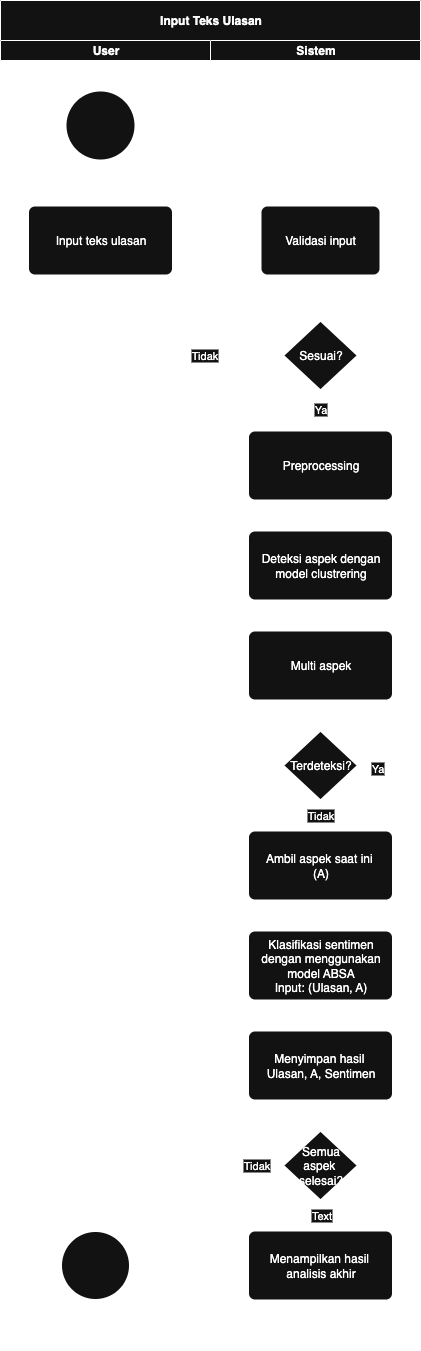

B. Upload file

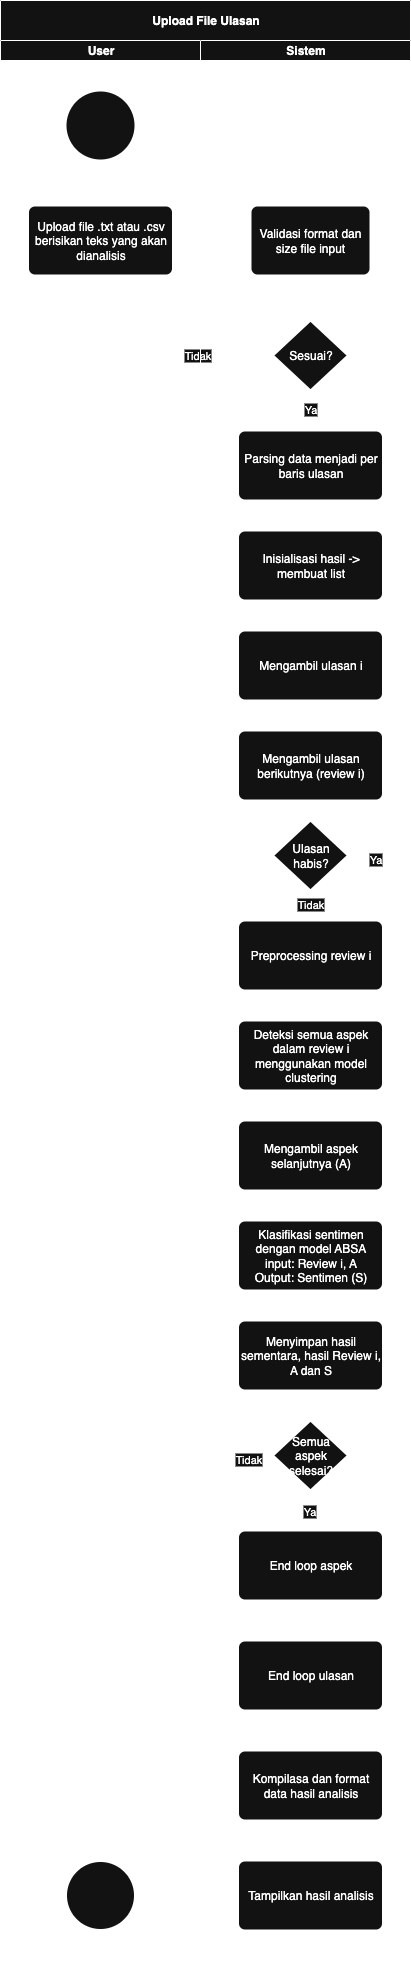

# DESAIN ANTARMUKA
A. Fitur input manual
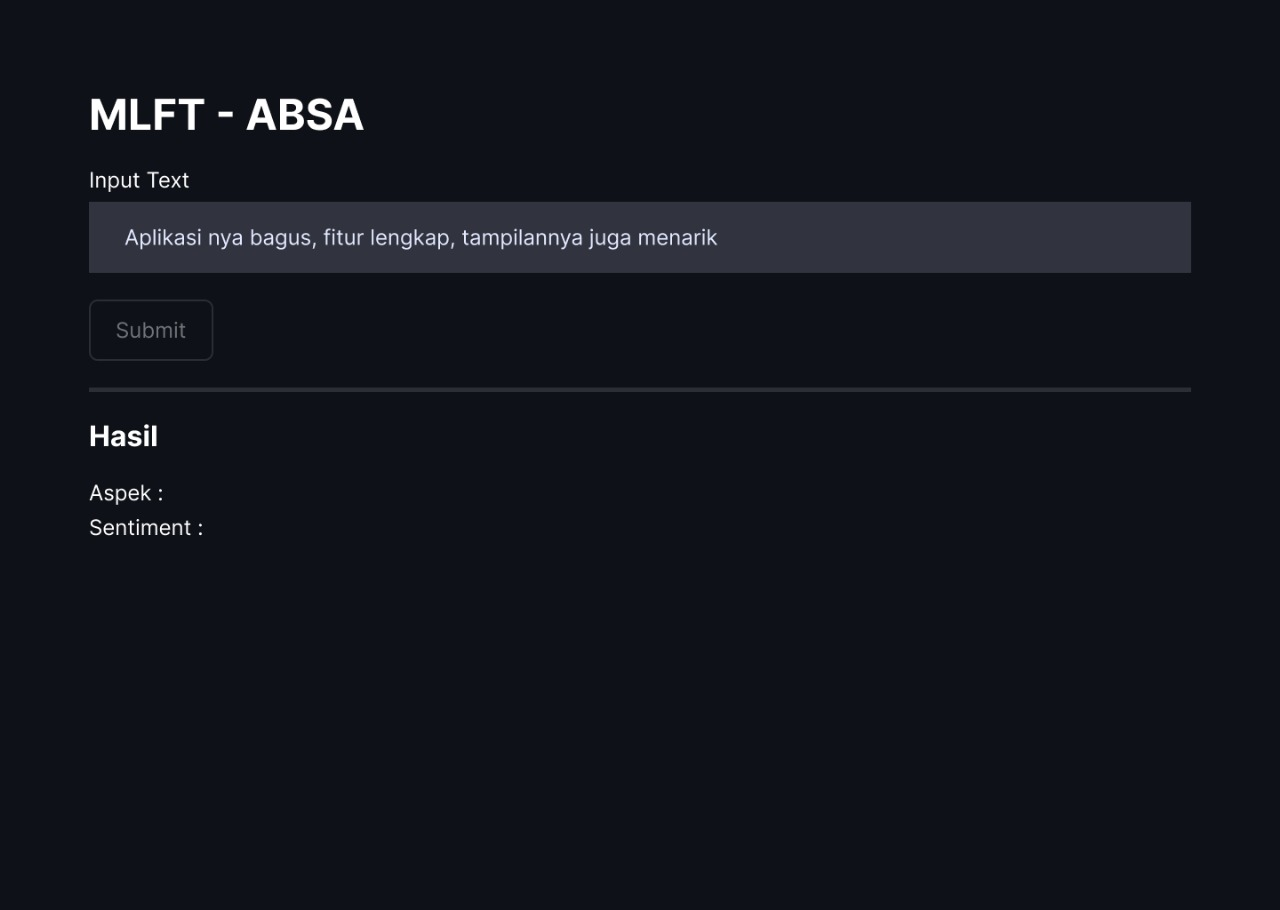

B. Fitur input excel
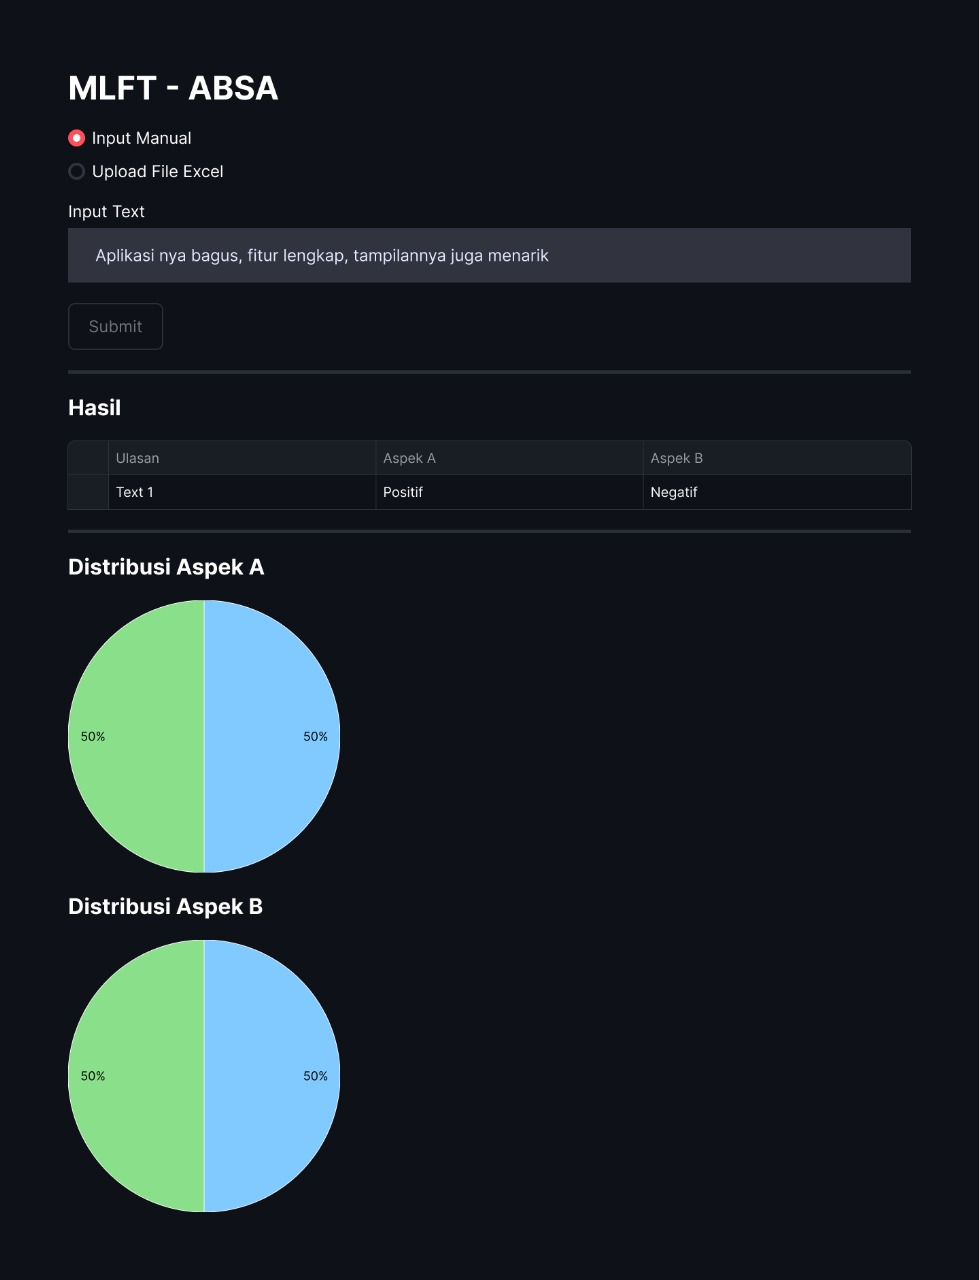



# Text Preprocessing

In [18]:
!pip install Sastrawi

In [19]:
data_prepro["lower_content"] = data_prepro["content"].str.lower()
print("Case Folding :\n")
data_prepro

Case Folding :



,content,score,label,lower_content
0,"hey admin, ku harap update berikutnya aplikasi...",4,positive,"hey admin, ku harap update berikutnya aplikasi..."
1,Gak ada lawan. Pengalaman interface yang luar ...,5,positive,gak ada lawan. pengalaman interface yang luar ...
2,Kelebihan : Chat Support cepat dijawab dan dil...,4,positive,kelebihan : chat support cepat dijawab dan dil...
3,Charting masih pinjam punya tradingview. Indik...,1,negative,charting masih pinjam punya tradingview. indik...
4,Agak males ah klo misal hapus akun terus no sa...,1,negative,agak males ah klo misal hapus akun terus no sa...
...,...,...,...,...
13015,Mantul..........,5,positive,mantul..........
13016,keren...,5,positive,keren...
13017,Great...,5,positive,great...
13018,Mantap.....,5,positive,mantap.....


In [20]:
import string
import re
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

# ============================================================
# 🧹 CLEANING TEXT STEP BY STEP
# ============================================================

def remove_Contents_special(text):
    text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
    text = text.encode('ascii', 'replace').decode('ascii')
    text = ' '.join(re.sub(r"([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)", " ", text).split())
    return text.replace("http://", " ").replace("https://", " ")


def remove_punctuation(text):
    return text.translate(str.maketrans("","",string.punctuation))

def remove_whitespace_LT(text):
    return text.strip()

def remove_whitespace_multiple(text):
    return re.sub(r'\s+',' ',text)

def remove_singl_char(text):
    return re.sub(r"\b[a-zA-Z]\b", "", text)

def remove_repeated_char(text):
    return re.sub(r'(.)\1+', r'\1', text)

def remove_number(text):
    return re.sub(r"[0-9]+", " ", text)


data_prepro['clean_content'] = data_prepro['lower_content'].apply(remove_Contents_special)
data_prepro['clean_content'] = data_prepro['clean_content'].apply(remove_punctuation)
data_prepro['clean_content'] = data_prepro['clean_content'].apply(remove_whitespace_LT)
data_prepro['clean_content'] = data_prepro['clean_content'].apply(remove_whitespace_multiple)
data_prepro['clean_content'] = data_prepro['clean_content'].apply(remove_repeated_char) 
data_prepro['clean_content'] = data_prepro['clean_content'].apply(remove_number)
data_prepro['clean_content'] = data_prepro['clean_content'].apply(remove_singl_char)

# ============================================================
# ✂️ TOKENIZATION
# ============================================================

def word_tokenize_wrapper(text):
    return word_tokenize(text)

data_prepro['Tokenization'] = data_prepro['clean_content'].apply(word_tokenize_wrapper)

print('✅ Hasil Tokenizing dan Cleaning:\n')
data_prepro


✅ Hasil Tokenizing dan Cleaning:



,content,score,label,lower_content,clean_content,Tokenization
0,"hey admin, ku harap update berikutnya aplikasi...",4,positive,"hey admin, ku harap update berikutnya aplikasi...",hey admin ku harap update berikutnya aplikasi ...,"[hey, admin, ku, harap, update, berikutnya, ap..."
1,Gak ada lawan. Pengalaman interface yang luar ...,5,positive,gak ada lawan. pengalaman interface yang luar ...,gak ada lawan pengalaman interface yang luar b...,"[gak, ada, lawan, pengalaman, interface, yang,..."
2,Kelebihan : Chat Support cepat dijawab dan dil...,4,positive,kelebihan : chat support cepat dijawab dan dil...,kelebihan chat suport cepat dijawab dan dilaya...,"[kelebihan, chat, suport, cepat, dijawab, dan,..."
3,Charting masih pinjam punya tradingview. Indik...,1,negative,charting masih pinjam punya tradingview. indik...,charting masih pinjam punya tradingview indika...,"[charting, masih, pinjam, punya, tradingview, ..."
4,Agak males ah klo misal hapus akun terus no sa...,1,negative,agak males ah klo misal hapus akun terus no sa...,agak males ah klo misal hapus akun terus no sa...,"[agak, males, ah, klo, misal, hapus, akun, ter..."
...,...,...,...,...,...,...
13015,Mantul..........,5,positive,mantul..........,mantul,[mantul]
13016,keren...,5,positive,keren...,keren,[keren]
13017,Great...,5,positive,great...,great,[great]
13018,Mantap.....,5,positive,mantap.....,mantap,[mantap]


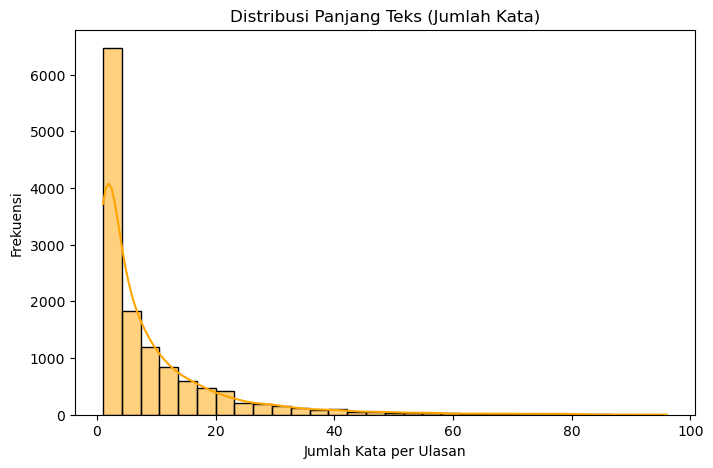

In [21]:
# ============================================================
# ✍️ PANJANG TEKS (SESUDAH CLEANING)
# ============================================================
data_prepro['text_length_raw'] = data_prepro['clean_content'].astype(str).apply(lambda x: len(x.split()))

plt.figure(figsize=(8,5))
sns.histplot(data['text_length_raw'], bins=30, kde=True, color='orange')
plt.title('Distribusi Panjang Teks (Jumlah Kata)')
plt.xlabel('Jumlah Kata per Ulasan')
plt.ylabel('Frekuensi')
plt.show()

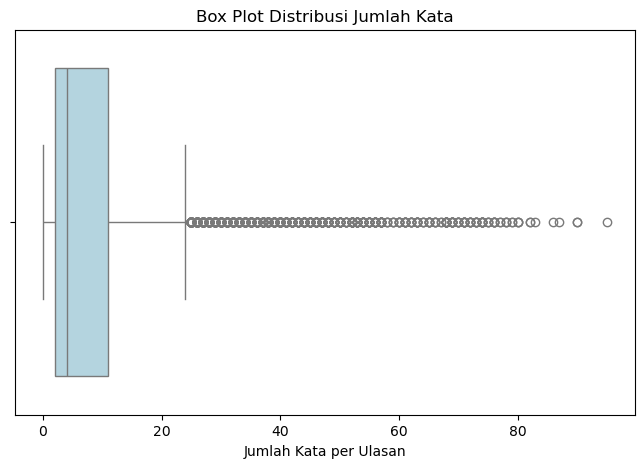

In [22]:
# ============================================================
# 📦 BOX PLOT JUMLAH KATA
# ============================================================
plt.figure(figsize=(8, 5))
sns.boxplot(x=data_prepro['text_length_raw'], color='lightblue')
plt.title('Box Plot Distribusi Jumlah Kata')
plt.xlabel('Jumlah Kata per Ulasan')
plt.show()

In [23]:
data_prepro[data_prepro['clean_content'].str.split().str.len() == 1]['clean_content'].head(50)

3039                     mengecewakan
4464                      pertahankan
7152                      persyaratan
7426                 mantabcuansukses
7470    symengertidancukupmemahaminya
7713                     menyenangkan
7818                     menyenangkan
7855                      pertahankan
7902                     menyenangkan
7919                        lanjutkan
8060                      menyebalkan
8064                     mantapsimpel
8082                       memudahkan
8125                            boleh
8126                            bagus
8135                              god
8137                               ok
8141                           nyaman
8142                           mantap
8143                           mantab
8144                           mantap
8147                              sip
8148                            keren
8149                           lancar
8151                           mantap
8154                           mantav
8155        

In [24]:
data_prepro[data_prepro['clean_content'].str.split().str.len() == 2]['clean_content'].head(50)

825            makin lengkapmantap
913              pendaftaran susah
918                menunya lengkap
957        cepatamandan terpercaya
1025    mantapmudah mengoperasikan
1028             sangat bagusjuara
1334              sangat memuaskan
1355               mudah digunakan
1388              sangat memuaskan
1436               sangat membantu
1449               cukup memuaskan
1480             sangat memudahkan
2382              memuaskan mantap
2389           nyaman berinvestasi
2426                 banyak alasan
2509         sederhanakan fiturnya
2551              mudah dimengerti
2841               sangat membantu
2860               mudah digunakan
3207               akhirnya nemuin
3274                  bagus sekali
3276                  bagus sekali
4293                  bagus sekali
4641                   terbaik lah
4642              mudah menentukan
4643                mantapz sekali
4691              lengkap fiturnya
4906              mudah dipakainya
4932              fi

In [25]:
data_prepro = data_prepro.drop_duplicates(subset='clean_content')

In [26]:
kondisi = data_prepro['clean_content'].str.split().str.len() > 2

data_prepro = data_prepro[kondisi]

In [27]:
kondisi = data_prepro['clean_content'].str.split().str.len() < 80
data_prepro = data_prepro[kondisi]

C:\Users\ilham\AppData\Local\Temp\ipykernel_25700\2046144023.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='label', data=data_prepro, palette='viridis')


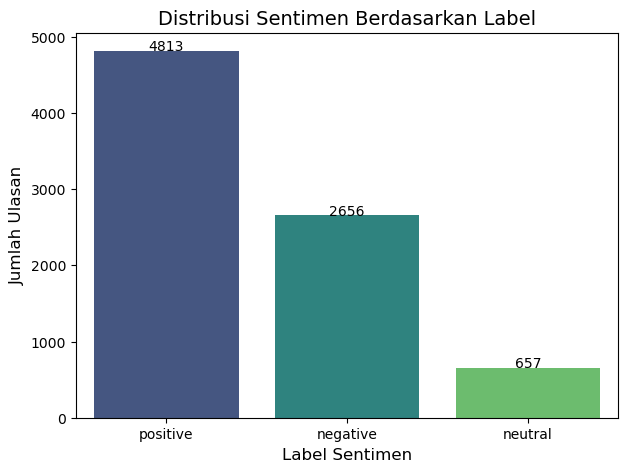

In [28]:
# ============================================================
# 📊 DISTRIBUSI LABEL SENTIMEN
# ============================================================

plt.figure(figsize=(7,5))
ax = sns.countplot(x='label', data=data_prepro, palette='viridis')

# Tambahkan angka di atas batang
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_height() + 5,
            int(p.get_height()), ha='center', fontsize=10, color='black')

plt.title('Distribusi Sentimen Berdasarkan Label', fontsize=14)
plt.xlabel('Label Sentimen', fontsize=12)
plt.ylabel('Jumlah Ulasan', fontsize=12)
plt.show()

In [29]:
# URL file normalisasi dari GitHub
url_normalisasi = "https://github.com/GdWidnyana/C1_UTS-PPDM-Text/raw/main/normalisasi.xlsx"

# Membaca file normalisasi langsung dari GitHub
normalizad_word = pd.read_excel(url_normalisasi)

# Membuat dictionary untuk normalisasi kata
normalizad_word_dict = {}
for index, row in normalizad_word.iterrows():
    if row[0] not in normalizad_word_dict:
        normalizad_word_dict[row[0]] = row[1]

normalizad_word_dict.update({
    "app": "aplikasi",
    "apk": "aplikasi",
    "wa": "whatsapp",
    "ig": "instagram",
    "fb": "facebook",
    "hp": "handphone",
    "kl": "kalau",
    "ni": "ini",
    "ok": "oke",
    "da": "sudah",
    "ng": "tidak",
    "ut": "untuk",
    "br": "baru",
    "ye": "iya",
    "bu": "butuh uang",
    "sd": "sudah",
    "cs": "customer service",
    "kl": "kalau",
    "ux": "user experience",
    "ui": "user interface",
    "dr": "dari",
    "pd": "pada",
    "jt": "juta",
    "gb": "gigabyte",
    "pw": "password",
    "tf": "transfer",
    "kg": "tidak",
    "rl": "kehidupan",
    "dm": "pesan",
    "ko": "kenapa",
    "id": "indonesia",
    "va": "virtual account",
    "ps": "saat",
    "vc": "panggilan",
    "stocbit": "stockbit",
    "sa": "saya",
    "gakbisa": "tidak bisa",
    "wd": "withdrawal",
    "on": "ke",
    "ap": "apa",
    "gd": "tidak ada",
    "sb": "stockbit",
    "it": "itu",
    "pt": "perusahaan",
    "mt": "maintenance",
    "bntng": "bintang",
    "fc": "keluar",
    "nd": "tidak",
    "nh": "nah",
    "mu": "kamu",
    "didlm": "dalam",
    "lm": "lama",
    "th": "tahun",
    "ra": "tidak",
    "jm": "jam",
    "withdrawl": "withdrawal",
    "bg": "bagi",
    "tld": "tolong",
    "koq": "kenapa",
    "kog": "kenapa",
    "sda": "sudah",
    "sni": "sini",
    "ush": "usah",
    "bgt": "banget",
    "cma": "cuma",
    "bnyk": "banyak",
    "lha": "bahkan",
    "oks": "oke",
    "rekomen": "rekomendasi",
    "komen": "komentar",
    "koment": "komentar",
    "okay": "oke",
    "god": "bagus",
    "mantab": "mantap",
    "mantabs": "mantap",
})

# Fungsi normalisasi kata
def normalized_term(document):
    return [normalizad_word_dict[term] if term in normalizad_word_dict else term for term in document]

# Menerapkan normalisasi ke data_prepro
data_prepro['Normalization'] = data_prepro['Tokenization'].apply(normalized_term)

# Menampilkan hasil
data_prepro[['content', 'score', 'label', 'Tokenization', 'Normalization']].head()

C:\Users\ilham\AppData\Local\Temp\ipykernel_25700\2444123304.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if row[0] not in normalizad_word_dict:
C:\Users\ilham\AppData\Local\Temp\ipykernel_25700\2444123304.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  normalizad_word_dict[row[0]] = row[1]


,content,score,label,Tokenization,Normalization
0,"hey admin, ku harap update berikutnya aplikasi...",4,positive,"[hey, admin, ku, harap, update, berikutnya, ap...","[hey, admin, saya, harap, update, berikutnya, ..."
1,Gak ada lawan. Pengalaman interface yang luar ...,5,positive,"[gak, ada, lawan, pengalaman, interface, yang,...","[tidak, ada, lawan, pengalaman, interface, yan..."
2,Kelebihan : Chat Support cepat dijawab dan dil...,4,positive,"[kelebihan, chat, suport, cepat, dijawab, dan,...","[kelebihan, chat, suport, cepat, dijawab, dan,..."
3,Charting masih pinjam punya tradingview. Indik...,1,negative,"[charting, masih, pinjam, punya, tradingview, ...","[charting, masih, pinjam, punya, tradingview, ..."
5,oke banget. fitur2nya saya suka. hanya untuk t...,5,positive,"[oke, banget, fitur, nya, saya, suka, hanya, u...","[oke, banget, fitur, nya, saya, suka, hanya, u..."


In [30]:
import requests
url_stopwords_raw = "https://raw.githubusercontent.com/stopwords-iso/stopwords-id/master/stopwords-id.txt"
response = requests.get(url_stopwords_raw)
stopwords_list = response.text.split('\n')

# Mengubah list menjadi set untuk pencarian yang lebih cepat
stopwords_set = set(stopwords_list)

all_new_stopwords = [
    "nya", "ya", "mi", "as", "oy", "gp", "yp", "bq", "cp", "od", "tg", "oh", 
    "ac", "eh", "sl", "cl", "rt", "rd", "dj", "sr", "mk", "hu", "ce", "rb", 
    "nb", "ta", "ik", "hv", "ot", "ks", "lc", "oe", "ts", "me", "ab", "gl", 
    "sc", "pl", "ci", "du", "bc", "hi", "ri", "vs", "dc", "oc", "cd", "om", 
    "do", "li", "ol", "rv", "xf", "vq", "ae", "df", "bo", "ho", "xn", "ug", 
    "fa", "oi", "nc", "vp", "sf", "ge", "na", "uh", "pe", "te", "hm", "st", 
    "ha", "we",
    
    'fe', 'of', 'up', 'is', 'us', 'by', 'or', 'al', 'pa', 'xl', 'lk', 'ah', 
    'an', 'pc', 'in', 'if', 'kr', 'tb', 'hk', 'ne', 'sh', 'tk', 'dk', 'pr', 
    'hp', 'he', 'gr', 'am', 'os', 'bt', 'be', 'ct', 'im', 'hq', 'bi', 'le', 
    'mg', 'ep', 'cz', 'sk', 'ai', 'su', 'nu', 'gu', 'ez', 'go', 'ba', 'eq', 
    'lh', 'qw', 'ew', 'qa', 'xc', 'my', 'at',

    'anj','bde','pcs','lao','air','beb','gos','lur','oce','coy','bag','lkh',
    'hel','aih','bah','les','pit','ben','lkp','hey'
]

# Jalankan satu perintah ini untuk menambahkan semuanya
stopwords_set.update(all_new_stopwords)

print(f"Total stopword dimuat: {len(stopwords_set)}")

Total stopword dimuat: 907


In [31]:
# Fungsi untuk menghapus stopwords
def remove_stopwords(document):
    # 'document' adalah list token dari kolom 'Normalization'
    return [word for word in document if word not in stopwords_set]

# Menerapkan stopword removal
# Kita terapkan pada hasil 'Normalization'
data_prepro['StopwordRemoval'] = data_prepro['Normalization'].apply(remove_stopwords)
data_prepro['StopwordRemoval']

0        [admin, harap, update, aplikasi, mode, landsca...
1        [lawan, pengalaman, interface, fitur, komplit,...
2        [kelebihan, chat, suport, cepat, dilayani, per...
3        [charting, pinjam, tradingview, indikator, par...
5        [oke, banget, fitur, suka, trading, cepat, mak...
                               ...                        
12905                                       [simpel, easy]
12938                                       [easy, simpel]
12939                               [persediaan, stockbit]
12944                                   [mudah, the, best]
13014                                                   []
Name: StopwordRemoval, Length: 8126, dtype: object

In [32]:
data_prepro = data_prepro[data_prepro['StopwordRemoval'].str.len() > 1]
data_prepro['StopwordRemoval']

0        [admin, harap, update, aplikasi, mode, landsca...
1        [lawan, pengalaman, interface, fitur, komplit,...
2        [kelebihan, chat, suport, cepat, dilayani, per...
3        [charting, pinjam, tradingview, indikator, par...
5        [oke, banget, fitur, suka, trading, cepat, mak...
                               ...                        
12894                                  [bagus, informstif]
12905                                       [simpel, easy]
12938                                       [easy, simpel]
12939                               [persediaan, stockbit]
12944                                   [mudah, the, best]
Name: StopwordRemoval, Length: 7881, dtype: object

In [33]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()


def stem_list_of_words(document):
    return [stemmer.stem(word) for word in document]

data_prepro['Stemming'] = data_prepro['StopwordRemoval'].apply(stem_list_of_words)

print(data_prepro[['StopwordRemoval', 'Stemming']])

                                         StopwordRemoval  \
0      [admin, harap, update, aplikasi, mode, landsca...   
1      [lawan, pengalaman, interface, fitur, komplit,...   
2      [kelebihan, chat, suport, cepat, dilayani, per...   
3      [charting, pinjam, tradingview, indikator, par...   
5      [oke, banget, fitur, suka, trading, cepat, mak...   
...                                                  ...   
12894                                [bagus, informstif]   
12905                                     [simpel, easy]   
12938                                     [easy, simpel]   
12939                             [persediaan, stockbit]   
12944                                 [mudah, the, best]   

                                                Stemming  
0      [admin, harap, update, aplikasi, mode, landsca...  
1      [lawan, alam, interface, fitur, komplit, ruang...  
2      [lebih, chat, suport, cepat, layan, pertanyan,...  
3      [charting, pinjam, tradingview, indi

In [34]:
data_prepro.to_csv('hasil_preprocessing.csv', index=False)

In [35]:
# Soft Clustering dengan TFIDF + LDA
# Import libraries yang dibutuhkan
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from gensim.models import CoherenceModel
from gensim.corpora import Dictionary
from gensim.models.ldamodel import LdaModel
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('hasil_preprocessing.csv')

In [36]:
print("\n=== Data Preparation ===")

def process_stemming_text(stemming_text):
    if isinstance(stemming_text, str):
        stemming_text = stemming_text.strip('[]').replace("'", "")
        if stemming_text.strip():
            return stemming_text.split(', ')
        else:
            return []
    return stemming_text

data['processed_text'] = data['Stemming'].apply(process_stemming_text)

data['text_string'] = data['processed_text'].apply(lambda x: ' '.join(x) if isinstance(x, list) else str(x))

data = data[data['text_string'].str.len() > 0].reset_index(drop=True)

print(f"Data setelah cleaning: {data.shape}")
print("Sample processed text:")
print(data[['Stemming', 'text_string']].head(3))


=== Data Preparation ===
Data setelah cleaning: (7881, 12)
Sample processed text:
                                            Stemming  \
0  ['admin', 'harap', 'update', 'aplikasi', 'mode...   
1  ['lawan', 'alam', 'interface', 'fitur', 'kompl...   
2  ['lebih', 'chat', 'suport', 'cepat', 'layan', ...   

                                         text_string  
0  admin harap update aplikasi mode landscape pot...  
1  lawan alam interface fitur komplit ruang disku...  
2  lebih chat suport cepat layan pertanyan receh ...  


In [37]:
print("\n=== TFIDF Vectorization ===")

tfidf_vectorizer = TfidfVectorizer(
    max_features=1000,  # Maksimal 1000 fitur
    min_df=5,           # Minimal muncul di 5 dokumen
    max_df=0.7,         # Maksimal muncul di 70% dokumen
    ngram_range=(1, 2)  # Unigram dan bigram
)

# Transform teks ke TFIDF matrix
tfidf_matrix = tfidf_vectorizer.fit_transform(data['text_string'])

print(f"TFIDF matrix shape: {tfidf_matrix.shape}")
print(f"Jumlah fitur: {len(tfidf_vectorizer.get_feature_names_out())}")
print("\n20 fitur pertama:")
print(tfidf_vectorizer.get_feature_names_out()[:20])


=== TFIDF Vectorization ===
TFIDF matrix shape: (7881, 1000)
Jumlah fitur: 1000

20 fitur pertama:
['academy' 'acount' 'ada' 'adakan' 'admin' 'adminya' 'aduh' 'agustus'
 'ajaib' 'ajar' 'ajar investasi' 'ajar saham' 'ajar trading' 'akses'
 'aktif' 'aku' 'akun' 'akun demo' 'akun real' 'akun sekuritas']



=== Finding Optimal Number of Topics ===
Menghitung coherence score untuk berbagai jumlah topik...
Topics: 2, Coherence Score: 0.5359
Topics: 3, Coherence Score: 0.5384
Topics: 4, Coherence Score: 0.4806
Topics: 5, Coherence Score: 0.5863
Topics: 6, Coherence Score: 0.5042
Topics: 7, Coherence Score: 0.5687
Topics: 8, Coherence Score: 0.5496
Topics: 9, Coherence Score: 0.5450
Topics: 10, Coherence Score: 0.5207
Topics: 11, Coherence Score: 0.5358
Topics: 12, Coherence Score: 0.4754
Topics: 13, Coherence Score: 0.4959
Topics: 14, Coherence Score: 0.4922


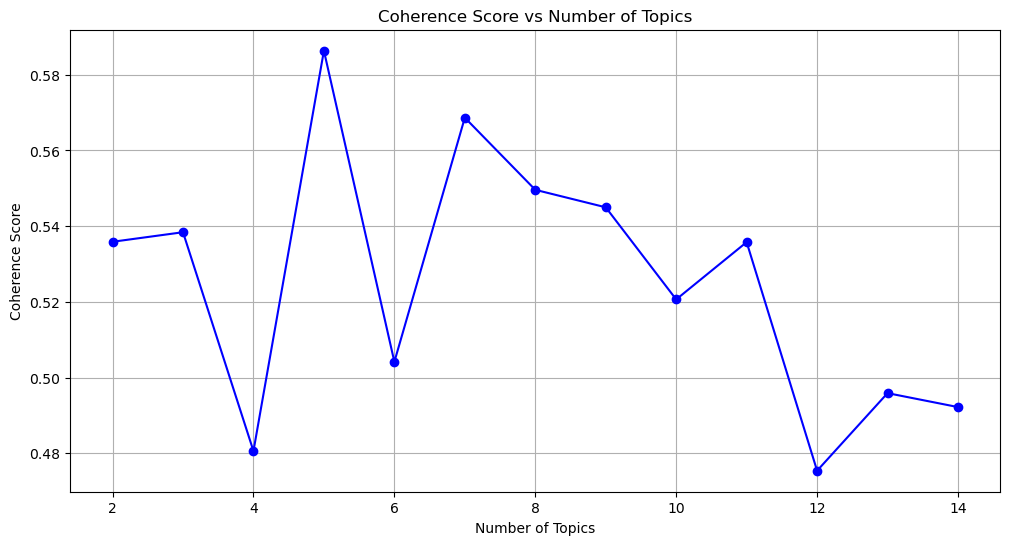


Jumlah topik optimal: 5
Coherence score tertinggi: 0.5863


In [38]:
print("\n=== Finding Optimal Number of Topics ===")

texts = data['processed_text'].tolist()
dictionary = Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

def calculate_coherence_score(corpus, dictionary, texts, num_topics):
    lda = LatentDirichletAllocation(
        n_components=num_topics,
        random_state=42,
        max_iter=100,
        learning_method='online',
        batch_size=128
    )
    lda.fit(tfidf_matrix)
    
    topics = []
    feature_names = tfidf_vectorizer.get_feature_names_out()
    for topic_idx, topic in enumerate(lda.components_):
        top_words_idx = topic.argsort()[-10:][::-1]
        top_words = [feature_names[i] for i in top_words_idx]
        topics.append(top_words)
    
    coherence_model = CoherenceModel(
        topics=topics,
        texts=texts,
        dictionary=dictionary,
        coherence='c_v'
    )
    return coherence_model.get_coherence()

topic_range = range(2, 15)
coherence_scores = []

print("Menghitung coherence score untuk berbagai jumlah topik...")
for num_topics in topic_range:
    score = calculate_coherence_score(corpus, dictionary, texts, num_topics)
    coherence_scores.append(score)
    print(f"Topics: {num_topics}, Coherence Score: {score:.4f}")

# Visualisasi coherence score
plt.figure(figsize=(12, 6))
plt.plot(topic_range, coherence_scores, 'bo-')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.title('Coherence Score vs Number of Topics')
plt.grid(True)
plt.show()

# Tentukan jumlah topik optimal
optimal_topics = topic_range[np.argmax(coherence_scores)]
print(f"\nJumlah topik optimal: {optimal_topics}")
print(f"Coherence score tertinggi: {max(coherence_scores):.4f}")

In [39]:
print(f"\n=== Training LDA with {optimal_topics} Topics ===")

# Inisialisasi dan training final LDA model
final_lda = LatentDirichletAllocation(
    n_components=optimal_topics,
    random_state=42,
    max_iter=200,
    learning_method='online',
    batch_size=128,
    evaluate_every=5,
    verbose=1
)

# Fit model
final_lda.fit(tfidf_matrix)

def print_topics(model, feature_names, n_top_words=10):
    topics = []
    for topic_idx, topic in enumerate(model.components_):
        top_words_idx = topic.argsort()[-n_top_words:][::-1]
        top_words = [feature_names[i] for i in top_words_idx]
        topics.append(top_words)
        print(f"Topic {topic_idx + 1}: {' | '.join(top_words)}")
    return topics

# Tampilkan topik-topik yang ditemukan
print(f"\nTop {optimal_topics} Topics:")
feature_names = tfidf_vectorizer.get_feature_names_out()
topics = print_topics(final_lda, feature_names)


=== Training LDA with 5 Topics ===
iteration: 1 of max_iter: 200
iteration: 2 of max_iter: 200
iteration: 3 of max_iter: 200
iteration: 4 of max_iter: 200
iteration: 5 of max_iter: 200, perplexity: 1056.9752
iteration: 6 of max_iter: 200
iteration: 7 of max_iter: 200
iteration: 8 of max_iter: 200
iteration: 9 of max_iter: 200
iteration: 10 of max_iter: 200, perplexity: 1048.1139
iteration: 11 of max_iter: 200
iteration: 12 of max_iter: 200
iteration: 13 of max_iter: 200
iteration: 14 of max_iter: 200
iteration: 15 of max_iter: 200, perplexity: 1045.7745
iteration: 16 of max_iter: 200
iteration: 17 of max_iter: 200
iteration: 18 of max_iter: 200
iteration: 19 of max_iter: 200
iteration: 20 of max_iter: 200, perplexity: 1044.5805
iteration: 21 of max_iter: 200
iteration: 22 of max_iter: 200
iteration: 23 of max_iter: 200
iteration: 24 of max_iter: 200
iteration: 25 of max_iter: 200, perplexity: 1043.8792
iteration: 26 of max_iter: 200
iteration: 27 of max_iter: 200
iteration: 28 of max_

In [40]:
import joblib

joblib.dump(final_lda, 'model_lda_final.joblib')
joblib.dump(tfidf_vectorizer, 'vectorizer_tfidf.joblib')

['vectorizer_tfidf.joblib']


=== Soft Clustering Results ===
Shape topic distributions: (7881, 5)
Sample topic distributions (first 5 documents):
Document 1: [0.67599876 0.11059987 0.05544238 0.1036888  0.05427018]
  Dominant topic: 1 (probability: 0.6760)
Document 2: [0.07235263 0.37184798 0.29261161 0.22420141 0.03898638]
  Dominant topic: 2 (probability: 0.3718)
Document 3: [0.03501442 0.2409507  0.03452226 0.32896273 0.36054988]
  Dominant topic: 5 (probability: 0.3605)
Document 4: [0.27088465 0.0937325  0.03959086 0.03982228 0.55596972]
  Dominant topic: 5 (probability: 0.5560)
Document 5: [0.62801948 0.05075132 0.23146    0.04493363 0.04483557]
  Dominant topic: 1 (probability: 0.6280)

Distribusi dokumen per topik:
Topic 1: 1235 documents (15.7%)
Topic 2: 1390 documents (17.6%)
Topic 3: 2086 documents (26.5%)
Topic 4: 1139 documents (14.5%)
Topic 5: 2031 documents (25.8%)


C:\Users\ilham\AppData\Local\Temp\ipykernel_25700\3167121682.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=dominant_topics, palette='viridis')


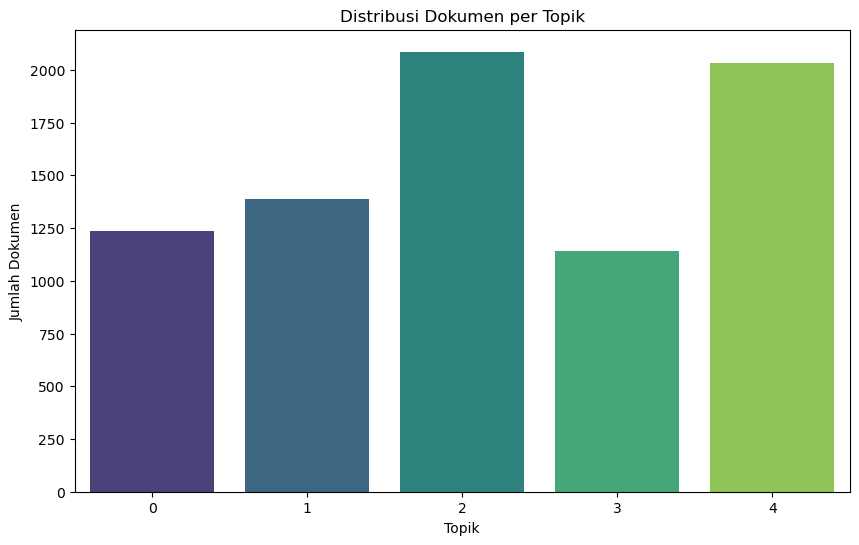

In [41]:
# Soft Clustering dengan LDA
print("\n=== Soft Clustering Results ===")

# Transform data ke topic distributions (soft clustering)
topic_distributions = final_lda.transform(tfidf_matrix)

# Assign dominant topic untuk setiap dokumen
dominant_topics = np.argmax(topic_distributions, axis=1)

# Tambahkan hasil clustering ke dataframe
data['dominant_topic'] = dominant_topics
data['topic_probability'] = np.max(topic_distributions, axis=1)

# Tambahkan semua topic probabilities
for i in range(optimal_topics):
    data[f'topic_{i+1}_prob'] = topic_distributions[:, i]

print(f"Shape topic distributions: {topic_distributions.shape}")
print(f"Sample topic distributions (first 5 documents):")
for i in range(5):
    print(f"Document {i+1}: {topic_distributions[i]}")
    print(f"  Dominant topic: {dominant_topics[i]+1} (probability: {np.max(topic_distributions[i]):.4f})")

print(f"\nDistribusi dokumen per topik:")
topic_counts = pd.Series(dominant_topics).value_counts().sort_index()
for topic_idx, count in topic_counts.items():
    percentage = (count / len(data)) * 100
    print(f"Topic {topic_idx+1}: {count} documents ({percentage:.1f}%)")

# Visualisasi distribusi topik
plt.figure(figsize=(10, 6))
sns.countplot(x=dominant_topics, palette='viridis')
plt.title('Distribusi Dokumen per Topik')
plt.xlabel('Topik')
plt.ylabel('Jumlah Dokumen')
plt.show()

In [43]:
print("\n=== Analisis Topik ===")

topic_interpretations = {
    0: "Proses Manajemen Dana (Deposit & Withdraw)",
    1: "Kemudahan Penggunaan Aplikasi (User Experience)",
    2: "Pembelajaran Investasi",
    3: "Fungsionalitas Inti Trading (Jual/Beli)",
    4: "Gangguan Teknis dan Jam Operasional"
}

# Tampilkan contoh dokumen untuk setiap topik
print("Contoh dokumen untuk setiap topik:")
for topic_idx in range(optimal_topics):
    print(f"\n=== Topic {topic_idx+1}: {topic_interpretations[topic_idx]} ===")
    print(f"Top words: {' | '.join(topics[topic_idx])}")
    
    # Ambil dokumen dengan probabilitas tertinggi untuk topik ini
    topic_docs = data[data['dominant_topic'] == topic_idx].nlargest(3, 'topic_probability')
    
    print("Contoh dokumen:")
    for idx, row in topic_docs.iterrows():
        print(f"  - {row['text_string'][:100]}... (prob: {row['topic_probability']:.4f})")

# Simpan hasil clustering
output_data = data[['content', 'dominant_topic', 'topic_probability'] + 
                   [f'topic_{i+1}_prob' for i in range(optimal_topics)]]

print(f"\n=== Summary ===")
print(f"Total dokumen yang diproses: {len(data)}")
print(f"Jumlah topik optimal: {optimal_topics}")
print(f"Coherence score: {max(coherence_scores):.4f}")
print(f"Rata-rata probabilitas topik dominan: {data['topic_probability'].mean():.4f}")
print(f"Dokumen dengan probabilitas > 0.7: {(data['topic_probability'] > 0.7).sum()} ({(data['topic_probability'] > 0.7).mean()*100:.1f}%)")



=== Analisis Topik ===
Contoh dokumen untuk setiap topik:

=== Topic 1: Proses Manajemen Dana (Deposit & Withdraw) ===
Top words: masuk | rdn | bank | withdrawal | dana | rekening | banget | withdraw | deposit | proses
Contoh dokumen:
  - daftar rdn bank jago rekening bank jago syariah rdn bca malas daftar rekening bca banyak rekening ni... (prob: 0.8450)
  - nunggu saldo masuk dompet utama jual saham tarik dana butuh kaya aplikasi belah... (prob: 0.8295)
  - tolong min cair tari uang asil jual saham cepat proses biar nunggu tarik rdn... (prob: 0.8271)

=== Topic 2: Kemudahan Penggunaan Aplikasi (User Experience) ===
Top words: mudah | fitur | lengkap | paham | oke | bagus | simpel | mudah paham | aplikasi | order
Contoh dokumen:
  - aplikasi bagus lengkap fitur lengkap mudah paham mula... (prob: 0.8234)
  - mantap informasi lengkap tempat sub menu mudah paham terima kasih... (prob: 0.8116)
  - aplikasi lengkap fitur baru sehinga mudah retail ecek saham akumulasi asing bantu banget ba

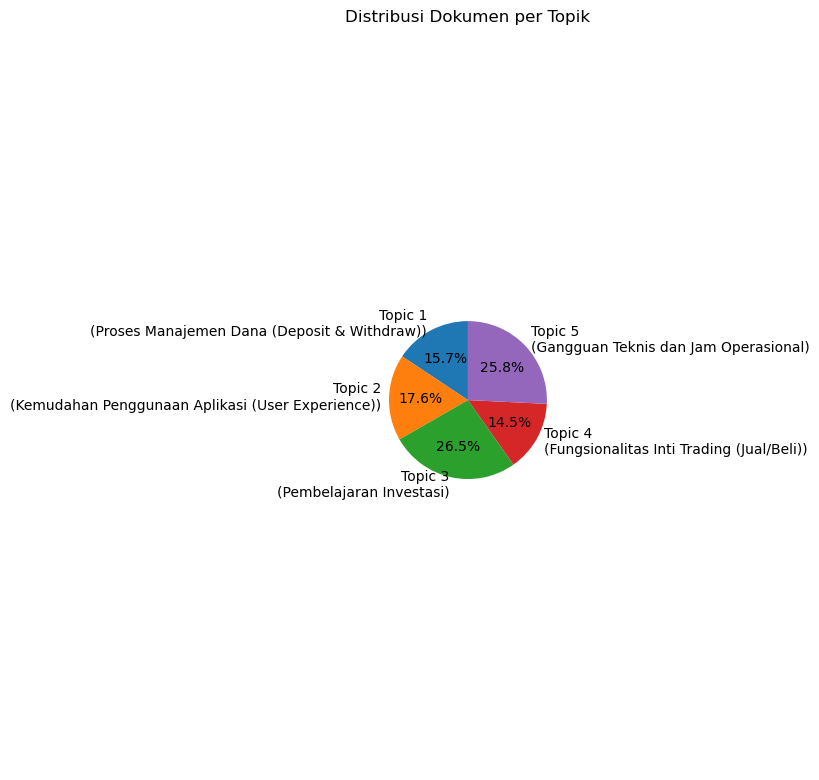

In [44]:
plt.figure(figsize=(8, 8))
topic_counts = data['dominant_topic'].value_counts().sort_index()
topic_labels = [f'Topic {i+1}\n({topic_interpretations[i]})' for i in range(optimal_topics)]
plt.pie(topic_counts, labels=topic_labels, autopct='%1.1f%%', startangle=90)
plt.title('Distribusi Dokumen per Topik')
plt.axis('equal')
plt.tight_layout()
plt.show()

In [45]:
data.to_csv('hasil_label_topic.csv', index=False)

In [1]:
import ast
import fasttext
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# --- 2️⃣ Load Dataset ---
file_path = "hasil_preprocessing.csv"  # ganti sesuai lokasi file
data = pd.read_csv(file_path)


In [3]:
# Pastikan kolom StopwordRemoval ada
assert "StopwordRemoval" in data.columns, "Kolom 'StopwordRemoval' tidak ditemukan di CSV."

# Konversi string list ke list Python asli
data["tokens"] = data["StopwordRemoval"].apply(ast.literal_eval)

print("Contoh data token:")
print(data["tokens"].head())

# --- 3️⃣ Load FastText Pretrained Model (Bahasa Indonesia) ---
model_path = "cc.id.300.bin"  # pastikan sudah ada di direktori kerja
ft = fasttext.load_model(model_path)
print("✅ FastText model loaded successfully!")


Contoh data token:
0    [admin, harap, update, aplikasi, mode, landsca...
1    [lawan, pengalaman, interface, fitur, komplit,...
2    [kelebihan, chat, suport, cepat, dilayani, per...
3    [charting, pinjam, tradingview, indikator, par...
4    [oke, banget, fitur, suka, trading, cepat, mak...
Name: tokens, dtype: object
✅ FastText model loaded successfully!


In [2]:
def get_doc_vector(tokens):
    word_vecs = [ft.get_word_vector(w) for w in tokens if w.strip() != ""]
    if not word_vecs:
        return np.zeros(ft.get_dimension())
    return np.mean(word_vecs, axis=0)

# Hitung embedding untuk semua dokumen
doc_embeddings = np.array([get_doc_vector(tokens) for tokens in data["tokens"]])
print(f"✅ Embedding shape: {doc_embeddings.shape}")


✅ Embedding shape: (7881, 300)


In [20]:
pca = PCA(n_components=50, random_state=42)
reduced_embeddings = pca.fit_transform(doc_embeddings)
print(f"✅ Reduced embeddings shape: {reduced_embeddings.shape}")


✅ Reduced embeddings shape: (7881, 50)


K=2, Davies–Bouldin Index=1.9599
K=3, Davies–Bouldin Index=1.9599
K=4, Davies–Bouldin Index=1.9599
K=5, Davies–Bouldin Index=1.9599
K=6, Davies–Bouldin Index=1.9599
K=7, Davies–Bouldin Index=1.9599
K=8, Davies–Bouldin Index=1.9599
K=9, Davies–Bouldin Index=1.9599
K=10, Davies–Bouldin Index=1.9599
K=11, Davies–Bouldin Index=1.9599
K=12, Davies–Bouldin Index=1.9599
K=13, Davies–Bouldin Index=1.9599
K=14, Davies–Bouldin Index=1.9599
K=15, Davies–Bouldin Index=1.9599
K=16, Davies–Bouldin Index=1.9599
K=17, Davies–Bouldin Index=1.9599
K=18, Davies–Bouldin Index=1.9599
K=19, Davies–Bouldin Index=1.9599


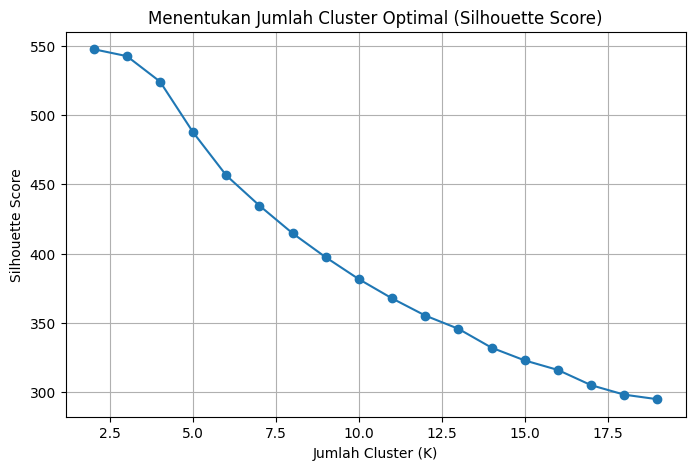

✅ Jumlah cluster optimal berdasarkan silhouette score: 2


In [ ]:
K_range = range(2, 15)
sil_scores = []

for k in K_range:
    kmeans = KMeans(
        n_clusters=k,
        init='k-means++',      # lebih baik daripada 'random'
        n_init=20,             # default 10; lebih banyak lebih stabil
        max_iter=500,          # biar gak cepat konvergen sebelum stabil
        random_state=42
    )
    labels = kmeans.fit_predict(reduced_embeddings)
    score = silhouette_score(reduced_embeddings, labels)
    sil_scores.append(score)
    print(f"K={k}, Silhouette Score={score:.4f}")

# --- 7️⃣ Visualisasi hasil silhouette score ---
plt.figure(figsize=(8,5))
plt.plot(K_range, sil_scores, marker='o')
plt.title("Menentukan Jumlah Cluster Optimal (Silhouette Score)")
plt.xlabel("Jumlah Cluster (K)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

# --- 8️⃣ Tentukan K terbaik ---
best_k = K_range[np.argmax(sil_scores)]
print(f"✅ Jumlah cluster optimal berdasarkan silhouette score: {best_k}")


In [ ]:
from sklearn.preprocessing import StandardScaler

texts = data['StopwordRemoval'].apply(eval)

def get_sentence_vector(tokens):
    vectors = [ft.get_word_vector(t) for t in tokens if t.strip() != '']
    if len(vectors) == 0:
        return np.zeros(ft.get_dimension())
    return np.mean(vectors, axis=0)

X_vectors = np.array([get_sentence_vector(tokens) for tokens in texts])

# === 4. Standardisasi data ===
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_vectors)

# === 5. Reduksi dimensi (opsional, untuk bantu clustering) ===
pca = PCA(n_components=50, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# === 6. Eksperimen K dan hitung Silhouette Score ===
for K in range(2, 15):
    kmeans = KMeans(
        n_clusters=K,
        init='k-means++',
        n_init=20,
        max_iter=500,
        random_state=42
    )
    labels = kmeans.fit_predict(X_pca)
    score = silhouette_score(X_pca, labels)
    print(f"K={K}, Silhouette Score={score:.4f}")


K=2, Silhouette Score=0.2176
K=3, Silhouette Score=0.1168
K=4, Silhouette Score=0.1045
K=5, Silhouette Score=0.1150
K=6, Silhouette Score=0.0853
K=7, Silhouette Score=0.0742
K=8, Silhouette Score=0.0793
K=9, Silhouette Score=0.0649
K=10, Silhouette Score=0.0677
K=11, Silhouette Score=0.0617
K=12, Silhouette Score=0.0611
K=13, Silhouette Score=0.0584
K=14, Silhouette Score=0.0657


In [17]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from sklearn.metrics import silhouette_score
from collections import Counter

# === 1. Ambil semua token dari kolom StopwordRemoval ===
# diasumsikan 'StopwordRemoval' berisi list token (string seperti "['makan', 'enak', 'harga']")
texts = data['StopwordRemoval'].apply(eval)

# === 2. Kumpulkan semua kata unik ===
all_words = [word for tokens in texts for word in tokens if word.strip() != '']
word_freq = Counter(all_words)

# (Opsional) Ambil kata yang cukup sering muncul biar cluster nggak noise
filtered_words = [w for w, c in word_freq.items() if c >= 3]  # ambil kata yang muncul minimal 3x

print(f"Jumlah kata unik sebelum filter: {len(all_words)}")
print(f"Jumlah kata unik sesudah filter: {len(filtered_words)}")

# model_path = "cc.id.300.bin"  # pastikan sudah ada di direktori kerja
# ft = fasttext.load_model(model_path)
# print("✅ FastText model loaded successfully!")

# === 3. Dapatkan FastText embedding untuk setiap kata ===
word_vectors = np.array([ft.get_word_vector(w) for w in filtered_words])

# === 4. Normalisasi vektor ===
X_norm = normalize(word_vectors)

# === 5. Reduksi dimensi untuk stabilitas clustering ===
pca = PCA(n_components=50, random_state=42)
X_pca = pca.fit_transform(X_norm)

# === 6. Eksperimen jumlah cluster (K) ===
for K in range(2, 15):
    kmeans = KMeans(
        n_clusters=K,
        init='k-means++',
        n_init=20,
        max_iter=500,
        random_state=42
    )
    labels = kmeans.fit_predict(X_pca)
    score = silhouette_score(X_pca, labels, metric='cosine')
    print(f"K={K}, Silhouette Score={score:.4f}")

Jumlah kata unik sebelum filter: 58304
Jumlah kata unik sesudah filter: 2040
K=2, Silhouette Score=0.1140
K=3, Silhouette Score=0.1040
K=4, Silhouette Score=0.0947
K=5, Silhouette Score=0.0735
K=6, Silhouette Score=0.0827
K=7, Silhouette Score=0.0808
K=8, Silhouette Score=0.0894
K=9, Silhouette Score=0.0928
K=10, Silhouette Score=0.0978
K=11, Silhouette Score=0.1073
K=12, Silhouette Score=0.1065
K=13, Silhouette Score=0.1132
K=14, Silhouette Score=0.1164


In [18]:
best_k = 8  # atau 9
kmeans = KMeans(n_clusters=best_k, random_state=42)
labels = kmeans.fit_predict(X_pca)

clusters = {i: [] for i in range(best_k)}
for word, label in zip(filtered_words, labels):
    clusters[label].append(word)

for label, words in clusters.items():
    print(f"\n🟩 Cluster {label}:")
    print(', '.join(words[:20]))


🟩 Cluster 0:
terpakai, disajikan, jaya, jam, berjalan, tibatiba, terlambat, diubah, berkalikali, disederhanakan, memakan, kali, menghilang, berkurang, sekian, ulang, mengantri, selesai, jangka, diperbaiki

🟩 Cluster 1:
mudah, komplit, layak, muda, terbaik, cepat, normal, menyebabkan, optimal, parah, berfungsi, mengalami, buruk, aneh, tampilanya, bagus, santai, sulit, disayangkan, lengkap

🟩 Cluster 2:
admin, update, aplikasi, mode, layar, pengguna, tablet, desktop, interface, fitur, chat, suport, eror, refresh, manual, datanya, screnshot, limit, opsi, order

🟩 Cluster 3:
memudahkan, pengalaman, ruang, diskusi, media, sosial, informasi, membandingkan, meningkatkan, layanan, kelebihan, pertanyan, kekurangan, indikator, solusi, apapun, pilihan, membuka, perubahan, penjelasan

🟩 Cluster 4:
landscape, market, runing, trade, charting, cash, maks, click, halo, min, bca, balance, low, star, cal, ful, usa, lag, ipo, candle

🟩 Cluster 5:
sekuritas, stockbit, kaum, receh, orderbok, emiten, trans

K=2, Coherence=0.2932
K=3, Coherence=0.3561
K=4, Coherence=0.3743
K=5, Coherence=0.3861
K=6, Coherence=0.4305
K=7, Coherence=0.4355
K=8, Coherence=0.4727
K=9, Coherence=0.4637
K=10, Coherence=0.4682


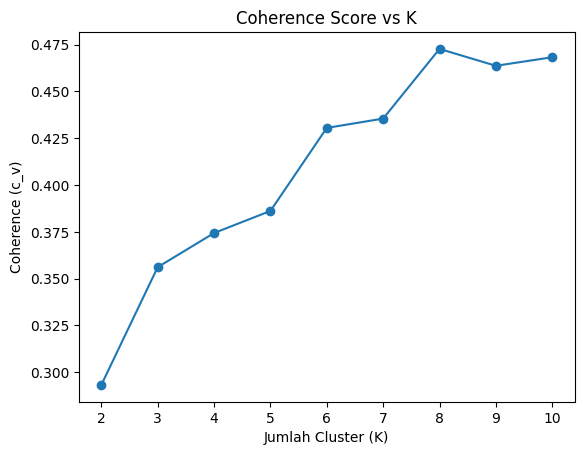

In [13]:
from gensim.models import CoherenceModel
from gensim.corpora.dictionary import Dictionary

dictionary = Dictionary(texts)
coherence_scores = []

for K in range(2, 11):
    kmeans = KMeans(n_clusters=K, random_state=42)
    labels = kmeans.fit_predict(X_pca)
    
    clusters = [[] for _ in range(K)]
    for word, label in zip(filtered_words, labels):
        clusters[label].append(word)
    
    cm = CoherenceModel(
        topics=clusters,
        texts=texts,
        dictionary=dictionary,
        coherence='c_v'
    )
    coherence = cm.get_coherence()
    coherence_scores.append(coherence)
    print(f"K={K}, Coherence={coherence:.4f}")

# (Opsional) Plot grafik
import matplotlib.pyplot as plt
plt.plot(range(2, 11), coherence_scores, marker='o')
plt.title("Coherence Score vs K")
plt.xlabel("Jumlah Cluster (K)")
plt.ylabel("Coherence (c_v)")
plt.show()


In [20]:
word_to_cluster = {}
for label, words in clusters.items():
    for w in words:
        word_to_cluster[w] = label

def get_dominant_aspect(tokens):
    # Ambil label cluster untuk tiap kata (jika ada)
    cluster_ids = [word_to_cluster[w] for w in tokens if w in word_to_cluster]
    if not cluster_ids:
        return None
    # Ambil cluster yang paling sering muncul
    most_common_cluster = Counter(cluster_ids).most_common(1)[0][0]
    return most_common_cluster

# Terapkan ke setiap baris
data['dominant_aspect'] = texts.apply(get_dominant_aspect)


In [21]:
aspect_names = {
    0: "Performance & Reliability",
    1: "Usability & Quality",
    2: "Features & Technical Issues",
    3: "User Experience & Service",
    4: "Finance & Platform",
    5: "Finance & Platform",          # karena gabungan cluster 4 + 5
    6: "Emotional Expression",
    7: "Feedback & Suggestions"
}

data['aspect_label'] = data['dominant_aspect'].map(aspect_names)


In [22]:
data.to_csv('data_labeled_aspect.csv', index=False, encoding='utf-8')
print("✅ File disimpan sebagai data_labeled_aspect.csv")

✅ File disimpan sebagai data_labeled_aspect.csv
